<a href="https://colab.research.google.com/github/Leogrimes25/PostPartumAssistAI/blob/main/PostPartumAssistAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PostPartumAssistAI

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
import pickle
base = pd.read_csv('/content/sample_data/Base TCC.csv')
base.head(10)

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
5,6/14/2022 20:06,30-35,No,No,Yes,Yes,Yes,Yes,No,No,Yes
6,6/14/2022 20:06,40-45,No,Yes,No,No,No,Yes,No,No,Yes
7,6/14/2022 20:07,35-40,Yes,No,Yes,Yes,No,Yes,No,No,No
8,6/14/2022 20:07,35-40,Yes,Yes,No,Yes,No,No,No,No,Yes
9,6/14/2022 20:11,30-35,Sometimes,Yes,Two or more days a week,No,Yes,Yes,No,Sometimes,Not interested to say


In [2]:
base = base.dropna()

In [3]:
base = base.drop(columns=['Timestamp'])
base = base.drop(columns=['Age'])

In [4]:
base['Feeling sad or Tearful'] = base['Feeling sad or Tearful'].replace({"Yes":1,"No":0,"Sometimes":0.5})
base['Irritable towards baby & partner'] = base['Irritable towards baby & partner'].replace({"Yes":1,"No":0,"Sometimes":0.5})
base['Trouble sleeping at night'] = base['Trouble sleeping at night'].replace({"Yes":0,"No":0,"Two or more days a week":0.5})
base['Problems concentrating or making decision'] = base['Problems concentrating or making decision'].replace({"Yes":1,"No":0,"Often":0.5})
base['Overeating or loss of appetite'] = base['Overeating or loss of appetite'].replace({"Yes":1,"No":0.5,"Not at all":0})
base['Feeling anxious'] = base['Feeling anxious'].replace({"Yes":1,"No":0})
base['Feeling of guilt'] = base['Feeling of guilt'].replace({"Yes":1,"No":0,"Maybe":0.5})
base['Problems of bonding with baby'] = base['Problems of bonding with baby'].replace({"Yes":1,"No":0,"Sometimes":0.5})
base['Suicide attempt'] = base['Suicide attempt'].replace({"Yes":1,"No":0,"Not interested to say":0})

/tmp/ipython-input-1446386692.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Feeling sad or Tearful'] = base['Feeling sad or Tearful'].replace({"Yes":1,"No":0,"Sometimes":0.5})
/tmp/ipython-input-1446386692.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Irritable towards baby & partner'] = base['Irritable towards baby & partner'].replace({"Yes":1,"No":0,"Sometimes":0.5})
/tmp/ipython-input-1446386692.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

In [5]:
X = base.drop(columns=['Feeling anxious'])
y = base['Feeling anxious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
selector = SelectKBest(f_classif, k=3)
selector.fit(X_train, y_train)

SelectKBest(k=3)

In [7]:
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})


scores = scores.sort_values(by='Score', ascending=True)

print(scores)

                                     Feature       Score
1           Irritable towards baby & partner    0.415928
0                     Feeling sad or Tearful    1.359292
7                            Suicide attempt    9.732558
2                  Trouble sleeping at night   17.038281
3  Problems concentrating or making decision   30.227779
4             Overeating or loss of appetite   40.785129
6              Problems of bonding with baby   62.099940
5                           Feeling of guilt  497.254201


In [8]:
selected_features = ['Overeating or loss of appetite', 'Feeling of guilt', 'Problems of bonding with baby','Problems concentrating or making decision']
X_best = base[selected_features]
y_best = base['Feeling anxious']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.3, random_state=42)

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
print("Resultados no Conjunto de Teste:")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Resultados no Conjunto de Teste:
Matriz de Confusão:
 [[118  34]
 [ 25 271]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       152
           1       0.89      0.92      0.90       296

    accuracy                           0.87       448
   macro avg       0.86      0.85      0.85       448
weighted avg       0.87      0.87      0.87       448



/usr/local/lib/python3.11/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


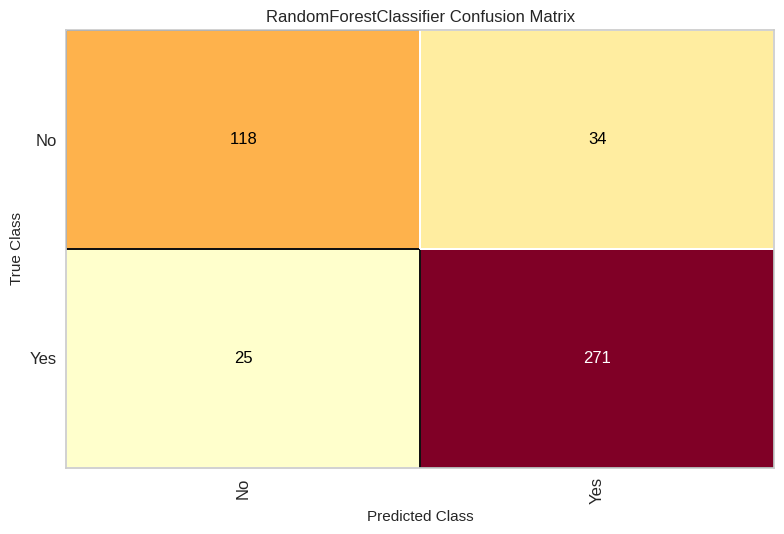

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
visualizer = ConfusionMatrix(rf, classes=["No", "Yes"])
visualizer.score(X_test, y_test)
visualizer.show()

Persistir o modelo Random Forest

In [15]:
random_forest_model_filename = 'random_forest_model.pkl'
with open(random_forest_model_filename, 'wb') as file:
    pickle.dump(rf, file)
print(f"Modelo Random Forest salvo com sucesso em '{random_forest_model_filename}'")

Modelo Random Forest salvo com sucesso em 'random_forest_model.pkl'
